# Importing Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set 

In [45]:
data = pd.read_csv('kc_house_data.csv')

In [47]:
#create dataset from the original dataframe
dataset = data[["sqft_living", "price"]]
# want to evaluate the impact of space on price
X_index = dataset.columns.get_loc("sqft_living")
y_index = dataset.columns.get_loc("price")
#define the independent variable
X = dataset.iloc[:, :-1].values
#define the dependent variable
y = dataset.iloc[:, -1].values

In [48]:
print(X)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [49]:
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


# Handling missing values 

In [50]:
#check for any missing values in dataset
if dataset.isnull().values.any():
    print('check missing values, and handle by using SimpleImputer')
else:
    print('No missing values, can move to next steps')

No missing values, can move to next steps


# Splitting the dataset into the Training set and test set

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #random_state not necessary

In [52]:
print(X_train)

[[1570]
 [1780]
 [1090]
 ...
 [2360]
 [2370]
 [2380]]


In [53]:
print(X_test)

[[1430]
 [4670]
 [1440]
 ...
 [1360]
 [ 950]
 [1640]]


In [54]:
print(y_train)

[495000. 635000. 382500. ... 431000. 411000. 699900.]


In [55]:
print(y_test)

[ 297000. 1578000.  562100. ...  369950.  300000.  575950.]


# Training the Simple Linear Regression model on the Training Set 

In [57]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Test set results 

In [58]:
y_pred = regressor.predict(X_test)

# Visualising the Training set results 

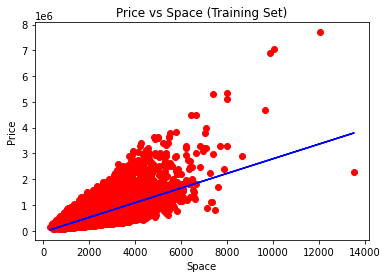

In [59]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Price vs Space (Training Set)')
plt.xlabel('Space')
plt.ylabel('Price')
plt.show()

# Visualising the Test set results

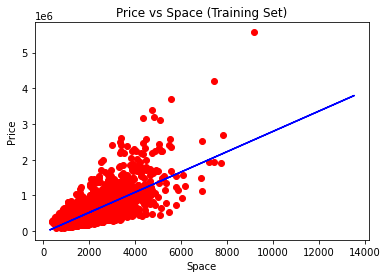

In [60]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Price vs Space (Training Set)')
plt.xlabel('Space')
plt.ylabel('Price')
plt.show()

# Making a single prediction (for example a 3500 sqrft appartement)

In [61]:
regressor.predict([[3500]])

array([945632.88645192])

# Getting the final linear regression equation with the values of the coefficients

In [62]:
#linear equation y = a +bx
b = regressor.coef_
a = regressor.intercept_

print(f"price = {a} + {b} * space")

price = -48257.06359102612 + [283.96855716] * space
